#### 1. K-Means Model

##### Exercise 1. Handwritten Digits

set up paths

In [1]:
# import library
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

# define paths
data_path = 'D:/python/pyforml/week04_multinomial-regression/homework'
# train path
train_img_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [2]:
# extract and read data from file
def get_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    import gzip # to decompress gz (zip) file

    # read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # convert into images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [11]:
# call read input method
train_images, train_labels = get_data(
    train_img_path, train_labels_path, 5000, shuffle=True)

print(train_images.shape, train_labels.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5808\2973448575.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


build model

In [13]:
from scipy.spatial.distance import cdist

'''step 1'''
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

'''step 2'''
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

'''step 3'''
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

'''stop condition'''
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [14]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while (it < 1000):
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

run model

In [18]:
# call to model
X = np.asarray(train_images)/256.0
K = 10
(centers, labels, it) = kmeans(X, K)
print(type(centers[-1]))
print(centers[-1].shape)

<class 'numpy.ndarray'>
(10, 784)


visualize result

In [19]:
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
    
    if not opt_graycolor:
        image *= 0.1
    
    k = 0
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
            clim = np.max(np.abs(A[:, k]))
            
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1
    return image

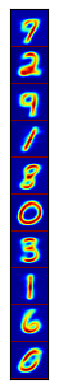

In [24]:
A = display_network(centers[-1].T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

##### Exercise 2. Dogs and Cats

In [ ]:
'''
Image clustering for Dogs and Cats dataset
'''

set up path

In [25]:
import os

base_dir = 'D:/python/pyforml/week08_cnn/cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


read image data

In [42]:
import numpy as np
import cv2

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cat_path = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
train_dog_path = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

N = 2*len(train_cat_path)
D = 150 * 150

X = np.zeros((D, N))

count = 0
for fname in train_cat_path:
    image = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (150, 150))
    X[:, count] = resized.reshape(D)
    count += 1

count = len(train_cat_path)
for fname in train_dog_path:
    image = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (150, 150))
    X[:, count] = resized.reshape(D)
    count += 1

X = X.T

In [43]:
X.shape

(2000, 22500)

display image

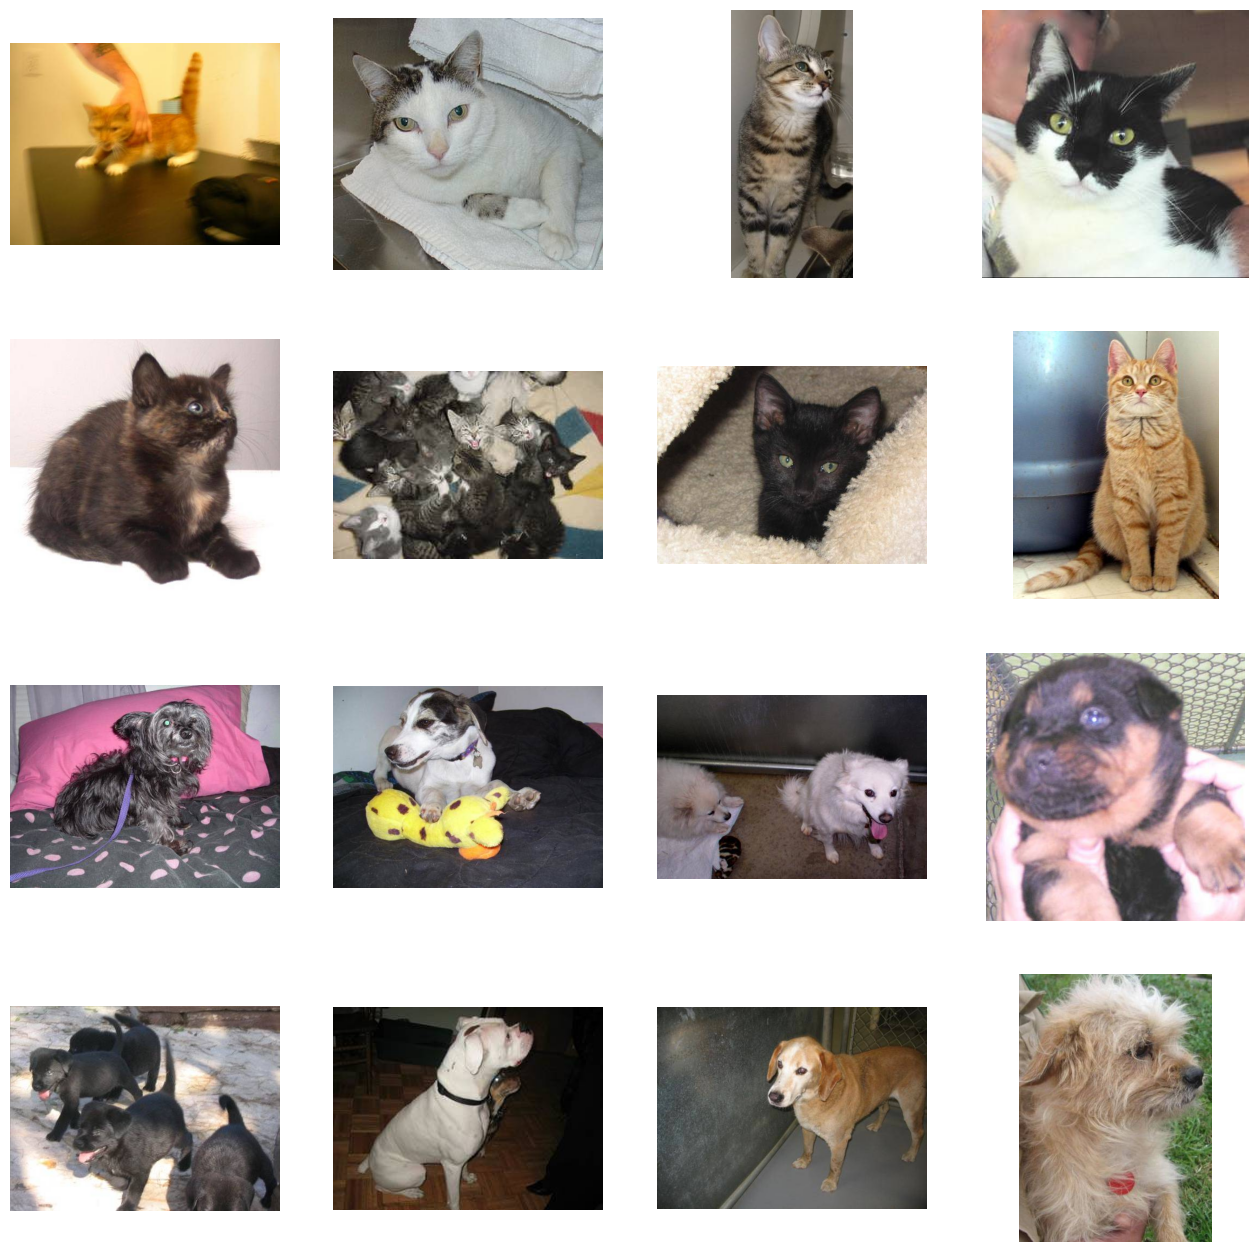

In [28]:
# print out examples
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameters for our graph: output images with 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # index for iterating over images

# set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = train_cat_path[:8]
next_dog_pix = train_dog_path[:8]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # set up subplot, indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # remove axes
    tmp = mpimg.imread(img_path)
    plt.imshow(tmp)

plt.show()

run KMeans model

In [29]:
from sklearn.cluster import KMeans

X0 = np.asarray(X)/256.0
X = X0
kmeans = KMeans(n_clusters=2).fit(X)
pred_label = kmeans.predict(X)

c:\Users\Admin\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


display image of each cluster for checking

(2, 22500)


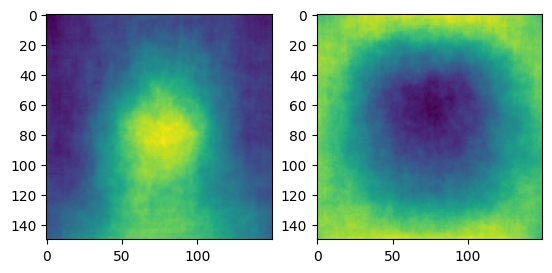

In [54]:
# Reshape array into 20x20 images
centers = kmeans.cluster_centers_
print(centers.shape)
imgs_centers = centers.reshape(-1, 150, 150)

# Visualise the cluster centers
fig, ax = plt.subplots(1, 2)
 
for i, center in zip(ax.flat, imgs_centers):
    i.imshow(center)

plt.show()

#### 2. Gaussian Mixture Model (EM Algorithm)

##### Exercise 1. Iris flower 

In [ ]:
'''
Clustering using Gaussian Mixture model for IRIS dataset
'''

read data from file

In [55]:
import numpy as np
from numpy import random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal

In [102]:
import pandas as pd

fn = 'D:/python/pyforml/week07_ann/iris.data'
df = pd.read_csv(fn, header=0)
Y = df['Species']
Y = Y.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
X = df.iloc[:, 1:5]
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica
146,2.5,5.0,1.9,Iris-virginica
147,3.0,5.2,2.0,Iris-virginica
148,3.4,5.4,2.3,Iris-virginica


build model

In [103]:
import scipy.stats as sp

class GaussianMixModel(object):
    def __init__(self, X, k=2):
        # Algorithm can work for any number of columns in dataset
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        print (np.mean(X))
        # number of mixtures
        self.k = k

    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n))+np.mean(self.data))
        #self.mean_arr[0]=0;
        #self.mean_arr[1]=25;
        self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.Z = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #Z Latent Variable giving probability of each point for each distribution

    def fit(self, tol=1e-4):
        # Algorithm will run unti max of log-likelihood is achieved
        self._init()
        num_iters = 0
        logl = 1
        previous_logl = 0
        while(logl-previous_logl > tol):
            previous_logl = self.loglikelihood()
            self.e_step()
            self.m_step()
            num_iters += 1
            logl = self.loglikelihood()
            print('Iteration %d: log-likelihood is %.6f'%(num_iters, logl))
        print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, logl))

    def loglikelihood(self):
        logl = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.multivariate_normal.pdf(self.data[i, :],self.mean_arr[j, :].A1,self.sigma_arr[j, :]) * self.phi[j]
            logl += np.log(tmp)
        return logl

    def e_step(self):
        #Finding probability of each point belonging to each pdf and putting it in latent variable Z
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                #print (self.data[i, :])
                num = sp.multivariate_normal.pdf(self.data[i, :],
                                                       self.mean_arr[j].A1,
                                                       self.sigma_arr[j]) *\
                      self.phi[j]
                den += num

                self.Z[i, j] = num
            self.Z[i, :] /= den
            assert self.Z[i, :].sum() - 1 < 1e-4  # Program stop if this condition is false

    def m_step(self):
        #Updating mean and variance
        for j in range(self.k):
            const = self.Z[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.Z[i, j])
                _sigma_j += self.Z[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))

            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const

In [106]:
x = X.iloc[:, :2]
x = np.array(x)
gmm = GaussianMixModel(x, 2)
gmm.fit()

3.4063333333333334
Iteration 1: log-likelihood is -411.200636
Iteration 2: log-likelihood is -365.334358
Iteration 3: log-likelihood is -353.716009
Iteration 4: log-likelihood is -338.189873
Iteration 5: log-likelihood is -330.336990
Iteration 6: log-likelihood is -326.973994
Iteration 7: log-likelihood is -324.993861
Iteration 8: log-likelihood is -323.321710
Iteration 9: log-likelihood is -321.507148
Iteration 10: log-likelihood is -319.020713
Iteration 11: log-likelihood is -314.240227
Iteration 12: log-likelihood is -302.789039
Iteration 13: log-likelihood is -280.648121
Iteration 14: log-likelihood is -244.946606
Iteration 15: log-likelihood is -237.576155
Iteration 16: log-likelihood is -237.575634
Iteration 17: log-likelihood is -237.575634
Terminate at 17-th iteration:log-likelihood is -237.575634


visualize

In [112]:
import matplotlib as mpl

def make_ellipses(gmm, ax):
    colors = ['turquoise', 'orange']
    for n, color in enumerate(colors):
        covariances = gmm.sigma_arr[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        mean=gmm.mean_arr[n]
        mean=mean.reshape(2,1)
        print(mean)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

def plot_2D(gmm,x,col,label):

    h = plt.subplot(111, aspect='equal')
    make_ellipses(gmm, h)

    plt.scatter(x[:,0],x[:,1],c=label['Species'],marker='x')
    plt.xlim(-3, 9)
    plt.ylim(-3, 9)
    plt.xlabel(col[0])
    plt.ylabel(col[1])
    #plot_cov_ellipse(gmm.sigma_arr[:,:,0],gmm.mean_arr[:,1],ax=ax[0,0])
    plt.show()

[[2.87198518]
 [4.90590536]]
[[3.41805832]
 [1.46400848]]


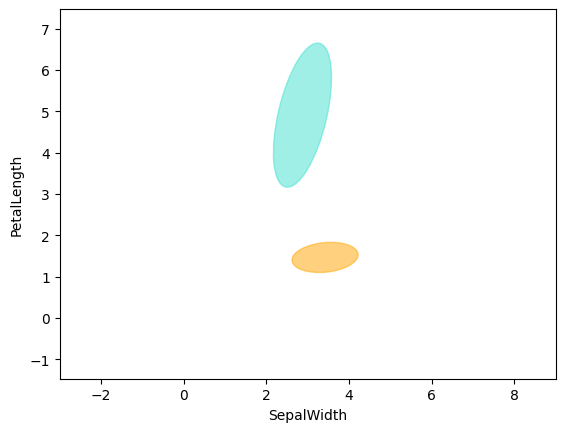

In [114]:
col=['SepalWidth','PetalLength']
plot_2D(gmm, x, col, df[['Species']])

##### Exercise 2. Compare to KMeans

generate random data

In [115]:
from numpy import random

def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    Will also plot the points in case of 2D.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x

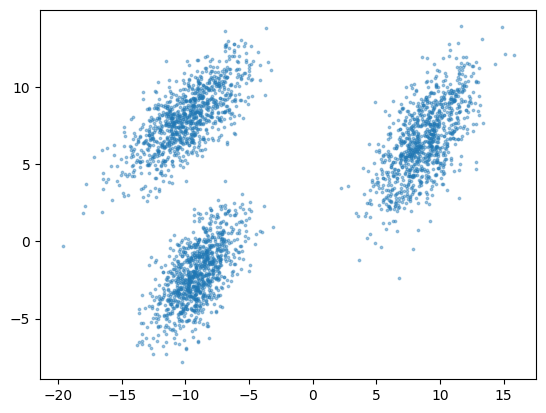

In [116]:
# Generate random 2D data with 3 clusters 
X = gen_data(k=3, dim=2, points_per_cluster=1000)

build KMeans model

In [117]:
'''step 1'''
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

'''step 2'''
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

'''step 3'''
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

'''stop condition'''
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [118]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while (it < 10000):
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

run model

In [123]:
# call to model
K = 3
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

Centers found by our algorithm:
[[ 8.71635781  6.48365996]
 [-9.12936069 -2.10201676]
 [-9.8886909   7.99872548]]


visualize

In [126]:
# visualize
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 2, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 2, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 2, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

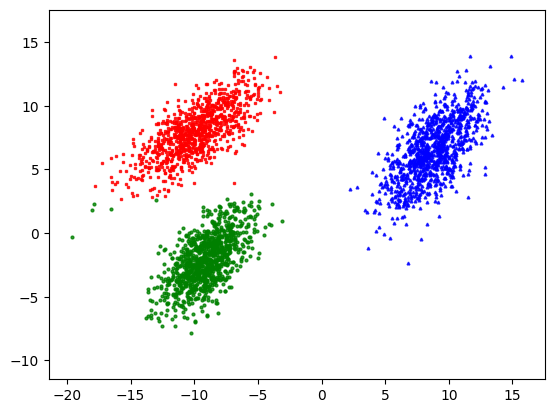

In [127]:
# display result visually
kmeans_display(X, labels[-1])

- Kết quả: phân cụm 3 cụm giống với tập dữ liệu ban đầu
- So sánh: kết quả phân cụm của 2 phương pháp khá tương đồng, do tập dữ liệu có thể phân tách tuyến tính (nhìn rõ 3 cụm phân biệt) nên KMeans vẫn có thể thực hiện tốt, tuy nhiên đối với các dữ liệu không phân tách rõ ràng thì GMM ưu trội hơn.

#### 3. Choosing K

read data

In [128]:
data = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv', header=0, index_col=0)
print(data.shape)
data.head()

(811, 106)


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,
P1,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [133]:
X = data.iloc[:, 54:]

choose number of clusters

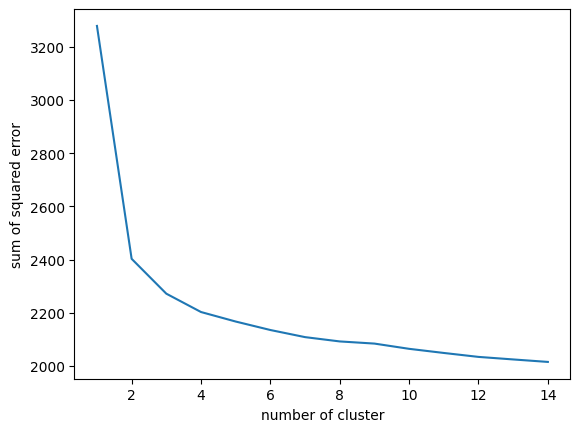

In [134]:
# elbow plot
sse = []
k_rng = range(1, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)

plt.xlabel('number of cluster')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)
plt.show()

# according to the plot, we will choose number of clusters k = 9

perform clustering

In [135]:
# perform clustering
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)